In [46]:
import uproot
import ROOT
import numpy as np

In [117]:
''' 

This function takes two root files:

hist_data: root file with data pileup histogram (non normalized)
hist_mc: root file with mc pileup histogram (normalized)

It will do:

1. Normalize the data histogram with respect to the its total area.
2. Compute weights between data and MC and return it.
3. Plot the histograms before the weighting process.


'''

def pileup_reweight(hist_data, hist_mc):
    
    # open root file using TFile
    file_data = ROOT.TFile.Open(hist_data, "READ")
    file_mc = ROOT.TFile.Open(hist_mc, "READ")
    # Get the histograms
    hist_data = file_data.Get("pileup")
    hist_mc = file_mc.Get("input_Event/N_TrueInteractions")
    
    ## Normalize data histogram 
    
    # Takes the integral and normalize
    norm_factor = hist_data.Integral()
    scal = 1/norm_factor
    hist_data.Scale(scal)
    
    hist_data.SetMinimum(0)
    hist_data.SetMaximum(0.06)
    
    yd = hist_data.GetYaxis()
    yd.SetTitle('Entries')
    
    xd = hist_data.GetXaxis()
    xd.SetTitle('Num. of rec. vertices')
    
    ## Creates the ratio histogram
    
    # Clone it from data histogram
    hist_ratio = hist_data.Clone("Auxiliar")
    hist_ratio.SetLineColor(ROOT.kBlack)
    hist_ratio.SetMarkerStyle(21)
    hist_ratio.SetTitle("") # Label inside the plot
    hist_ratio.SetMinimum(0.8)
    hist_ratio.SetMaximum(1.35)
    hist_ratio.SetStats(0) # To remove stats bar
    
    # Takes the ratio between data and mc
    hist_ratio.Divide(hist_mc)
    
    ## Stores the values for bins and weigths
        
    # Take the number of bins
    nbins = hist_ratio.GetNcells()
    
    # array for storing bins and bins content
    bins = np.empty([nbins])
    mc_weight = np.empty([nbins])
    
    # loop to do the weighting
    for i in range(0, nbins):
        # Take the bin content (weight)
        weight = hist_ratio.GetBinContent(i)
        # Take the unweighted mc value
        mc_current_content = hist_mc.GetBinContent(i)
        # Compute the weighted mc value
        mc_weighted_content = mc_current_content * weight
        # Store the bins and the mc content weighted
        bins[i] = i
        mc_weight[i] = mc_weighted_content
    
    ## To plot the histograms
    
    # Adjust y-axis settings
    y = hist_ratio.GetYaxis()
    y.SetTitle("Ratio Plot")
    y.SetNdivisions(505)
    y.SetTitleSize(20)
    y.SetTitleFont(43)
    y.SetTitleOffset(1.55)
    y.SetLabelFont(43)
    y.SetLabelSize(15)

    # Adjust x-axis settings
    x = hist_ratio.GetXaxis()
    x.SetTitleSize(20)
    x.SetTitleFont(43)
    x.SetTitleOffset(4.0)
    x.SetLabelFont(43)
    x.SetLabelSize(15)
    
    c = ROOT.TCanvas("c", "canvas", 800, 800)
    # Upper histogram plot is pad1
    pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
    pad1.SetBottomMargin(0)  # joins upper and lower plot
    pad1.SetGridx()
    pad1.SetGridy()
    pad1.Draw()
    # Lower ratio plot is pad2
    c.cd()  # returns to main canvas before defining pad2
    pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
    pad2.SetTopMargin(0)  # joins upper and lower plot
    pad2.SetBottomMargin(0.2)
    pad2.SetGridx()
    pad2.SetGridy()
    pad2.Draw()
    
    # draw everything
    pad1.cd()
    hist_data.Draw()
    hist_mc.Draw("same")    
    pad2.cd()
    hist_ratio.Draw("ep")
    c.Draw()
    c.SaveAs("ratio_plot_before.png")
    del(c)
    
    return bins, mc_weight

In [118]:
''' 

This function takes two root files:

hist_data: root file with data pileup histogram (non normalized)
hist_mc: root file with mc pileup histogram (normalized)

It will do:

1. Normalize the data histogram with respect to the its total area.
2. Weight the mc histogram by using the previous function
3. Plot the histograms after the weighting process.


'''

def plot_mc_weight(hist_data, hist_mc):
    
    bins, weight = pileup_reweight(hist_data, hist_mc)
    
    # open root file using TFile
    file_data = ROOT.TFile.Open(hist_data, "READ")
    file_mc = ROOT.TFile.Open(hist_mc, "READ")
    # Get the histograms
    hist_data = file_data.Get("pileup")
    hist_mc = file_mc.Get("input_Event/N_TrueInteractions")
    
    ## Normalize data histogram 
    
    # Takes the integral and normalize
    norm_factor = hist_data.Integral()
    scal = 1/norm_factor
    hist_data.Scale(scal)
    
    hist_data.SetMinimum(0)
    hist_data.SetMaximum(0.06)
    
    yd = hist_data.GetYaxis()
    yd.SetTitle('Entries')
    
    xd = hist_data.GetXaxis()
    xd.SetTitle('Num. of rec. vertices')
    
    ## Creates the ratio histogram
    
    # Clone it from data histogram
    hist_ratio = hist_data.Clone("Auxiliar")
    hist_ratio.SetLineColor(ROOT.kBlack)
    hist_ratio.SetMarkerStyle(21)
    hist_ratio.SetTitle("") # Label inside the plot
    hist_ratio.SetMinimum(0.8)
    hist_ratio.SetMaximum(1.35)
    hist_ratio.SetStats(0) # To remove stats bar
    
    # Takes the ratio between data and mc
    #hist_ratio.Divide(hist_mc)
    
    ## Stores the values for bins and weigths
        
    # Take the number of bins
    nbins = hist_ratio.GetNcells()
    
    # array for storing bins and bins content
    #bins = np.empty([nbins])
    #mc_weight = np.empty([nbins])
    
    # loop to do the weighting
    for i in range(0, nbins):
        hist_mc.SetBinContent(i, weight[i]) 
    
    hist_ratio.Divide(hist_mc)
    
    
    # Adjust y-axis settings
    y = hist_ratio.GetYaxis()
    y.SetTitle("Ratio Plot")
    y.SetNdivisions(505)
    y.SetTitleSize(20)
    y.SetTitleFont(43)
    y.SetTitleOffset(1.55)
    y.SetLabelFont(43)
    y.SetLabelSize(15)

    # Adjust x-axis settings
    x = hist_ratio.GetXaxis()
    x.SetTitleSize(20)
    x.SetTitleFont(43)
    x.SetTitleOffset(4.0)
    x.SetLabelFont(43)
    x.SetLabelSize(15)
    
    c = ROOT.TCanvas("c", "canvas", 800, 800)
    # Upper histogram plot is pad1
    pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
    pad1.SetBottomMargin(0)  # joins upper and lower plot
    pad1.SetGridx()
    pad1.SetGridy()
    pad1.Draw()
    # Lower ratio plot is pad2
    c.cd()  # returns to main canvas before defining pad2
    pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
    pad2.SetTopMargin(0)  # joins upper and lower plot
    pad2.SetBottomMargin(0.2)
    pad2.SetGridx()
    pad2.SetGridy()
    pad2.Draw()
    
    # draw everything
    pad1.cd()
    hist_data.Draw()
    hist_mc.Draw("same")    
    pad2.cd()
    hist_ratio.Draw("ep")
    c.Draw()
    c.SaveAs("ratio_plot_after.png")

Info in <TCanvas::Print>: png file ratio_plot_before.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ratio_plot_after.png has been created


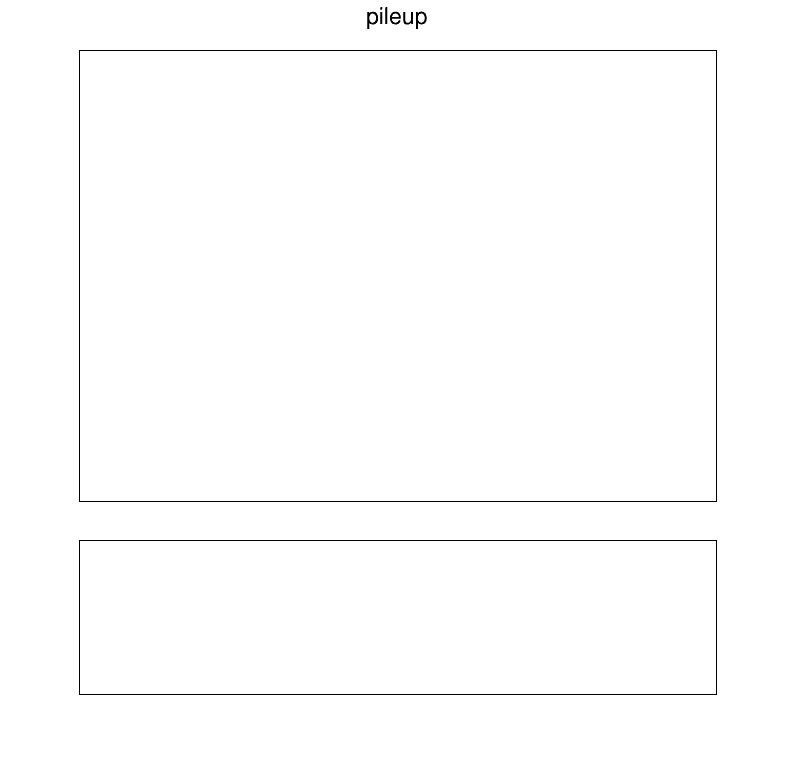

In [119]:
hist_data = "PileupData.root"
hist_mc = "PileupMC.root"
plot_mc_weight(hist_data, hist_mc)